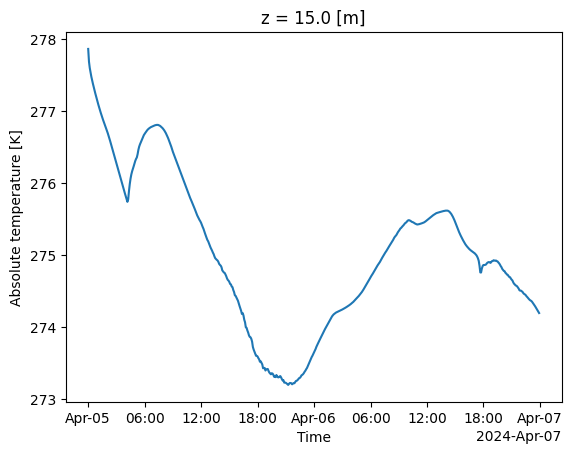

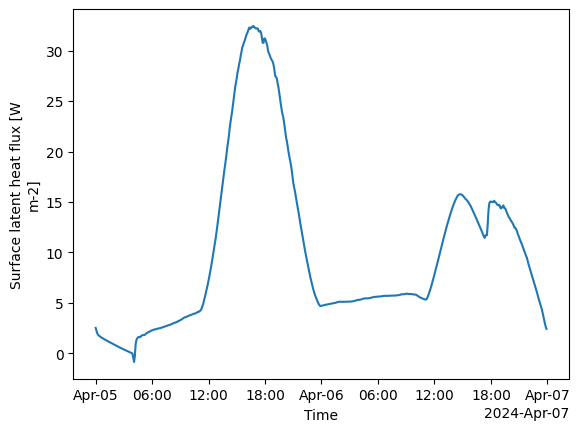

In [5]:
import open_xarray as ox
import numpy as np
import xarray as xr
import matplotlib.pyplot as pl

ds=ox.open_xarray('/users/PFS0220/graghuna/Other_HPCs/CLE.default.0000000.nc')
ds1=ox.open_xarray('/fs/ess/PFS0220/LSM/Eclipse/SGP_20231014/SGP.default.0000000.nc')

pl.figure()
ds.T.sel(z=15).plot.line(x='time')

pl.figure()
ds.LE.plot()